<a href="https://colab.research.google.com/github/RodrigoMachadodaSilva/Ci-ncia-de-Dados-An-lise-dados-de-cr-dito/blob/main/Projeto_Base_Cart%C3%A3o_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Um gerente do banco está incomodado com cada vez mais clientes deixando seus serviços de cartão de crédito. Eles realmente apreciariam se alguém pudesse prever quem será afetado para que possam ir proativamente ao cliente para fornecer-lhes melhores serviços e direcionar as decisões dos clientes na direção oposta

Agora, este conjunto de dados consiste em 10.000 clientes mencionando sua idade, salário, status_marital, limite do cartão de crédito, categoria do cartão de crédito, etc. Existem quase 18 recursos.

Temos apenas 16,07% de clientes que cancelaram. Portanto, é um pouco difícil treinar nosso modelo para prever a rotatividade de clientes.

Data Description
There are a total of 21 variables

Client Num: unique ID for each client
Attrition_Flag (2 levels: Attrited Customer, Existing Customer)
Customer_Age
Gender
Dependent_count
Education_Level (7 levels: College, Doctorate, Graduate, High School, Post-Graduate, Uneducated, Unknown)
Marital_Status (4 levels: Divorced, Married, Single, Unknown)
Income_Category (6 levels: <40k, 40-60k, 60-80k, 80-120k, >120k, Unknown)
Card_Category (4 levels: Blue, Gold, Platinum, Silver)
Months_on_book (with respect to a Purchased Loan, the number of complete calendar months that have elapsed since calendar month in which the Origination Date of such Purchased Loan occurred)
Total_Relationship_Count (Total number of products held by the customers, e.g. cards, accounts, etc.)
Months_Inactive_12_mon (Number of months that customer is inactive)
Contacts_Count_12_mon (Number of times the bank contacted the customer and/or vice versa)
Credit_Limit (Maximum amount you can borrow using a credit card or line of credit)
Total_Revolving_Bal (Total unpaid balance on the revolving credit account)
Avg_Open_To_Buy (Average difference between the credit limit assigned to a cardholder account and the present balance on the account)
Total_Amt_Chng_Q4_Q1 (Change in customer's expenditure between the 4th and the 1st quarter)
Total_Trans_Amt (Amount of all transcations)
Total_Trans_Ct (Number of transcation)
Total_Ct_Chng_Q4_Q1 (Change in the number of transcations made by customer between the 4th and the 1st quarter)
Avg_Utilization_Ratio (Credit Utilization Ratio is how much you currently owe divided by your credit limit, i.e. a low utilization rate implies that customer is using less of the available credit)

# EXPLORAÇÃO DOS DADOS`



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
base_credito = pd.read_csv('/content/BankChurners.csv')

In [ ]:
base_credito.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
base_credito = base_credito.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis =1)

In [ ]:
base_credito = base_credito.rename(columns={'CLIENTNUM':'ID',	'Attrition_Flag':'CONDICAO',
                                              'Customer_Age':'IDADE',	'Gender':'GENERO',
                                              'Dependent_count':'DEPENDENTES','Education_Level':'INSTRUÇAO',
                                              'Marital_Status':'ESTADO_CIVIL','Income_Category':'RENDA',
                                              'Card_Category':'TIPO_DO_CARTAO',	'Months_on_book':'TEMPO(MESES)',	
                                              'Total_Relationship_Count':'PRODUTOS_ATIVOS',	
                                              'Months_Inactive_12_mon':'PERIODO_INATIVO',	'Contacts_Count_12_mon':
                                              'CONTATOS_COM_BANCO','Credit_Limit':'LIMITE_DE_CREDITO',	
                                              'Total_Revolving_Bal':'SALDO_TOTAL_NAO_PAGO',	'Avg_Open_To_Buy':'DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA',
                                              'Total_Amt_Chng_Q4_Q1':'MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE',
                                              'Total_Trans_Amt':'VALOR_TOTAL_DAS_TRANSACOES',
                                              'Total_Trans_Ct':'NUMERO_DE_TRANSACOES','Total_Ct_Chng_Q4_Q1':'ALTERACAO_NO_NUMERO_DE_TRANSACOES_ENTRE_0_4°_E_1°_TRIMESTRE',
                                              'Avg_Utilization_Ratio':'TAXA_DE_UTILIZACAO_DE_CREDITO'})

In [ ]:
base_credito.head()

,ID,CONDICAO,IDADE,GENERO,DEPENDENTES,INSTRUÇAO,ESTADO_CIVIL,RENDA,TIPO_DO_CARTAO,TEMPO(MESES),PRODUTOS_ATIVOS,PERIODO_INATIVO,CONTATOS_COM_BANCO,LIMITE_DE_CREDITO,SALDO_TOTAL_NAO_PAGO,DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA,MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE,VALOR_TOTAL_DAS_TRANSACOES,NUMERO_DE_TRANSACOES,ALTERACAO_NO_NUMERO_DE_TRANSACOES_ENTRE_0_4°_E_1°_TRIMESTRE,TAXA_DE_UTILIZACAO_DE_CREDITO
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
base_credito['CONDICAO'] = base_credito['CONDICAO'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)


In [ ]:
base_credito

,ID,CONDICAO,IDADE,GENERO,DEPENDENTES,INSTRUÇAO,ESTADO_CIVIL,RENDA,TIPO_DO_CARTAO,TEMPO(MESES),PRODUTOS_ATIVOS,PERIODO_INATIVO,CONTATOS_COM_BANCO,LIMITE_DE_CREDITO,SALDO_TOTAL_NAO_PAGO,DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA,MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE,VALOR_TOTAL_DAS_TRANSACOES,NUMERO_DE_TRANSACOES,ALTERACAO_NO_NUMERO_DE_TRANSACOES_ENTRE_0_4°_E_1°_TRIMESTRE,TAXA_DE_UTILIZACAO_DE_CREDITO
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
base_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           10127 non-null  int64  
 1   CONDICAO                                                     10127 non-null  int64  
 2   IDADE                                                        10127 non-null  int64  
 3   GENERO                                                       10127 non-null  object 
 4   DEPENDENTES                                                  10127 non-null  int64  
 5   INSTRUÇAO                                                    10127 non-null  object 
 6   ESTADO_CIVIL                                                 10127 non-null  object 
 7   RENDA                                                        10127 non-null 

In [ ]:
base_credito.isnull().sum()

ID                                                             0
CONDICAO                                                       0
IDADE                                                          0
GENERO                                                         0
DEPENDENTES                                                    0
INSTRUÇAO                                                      0
ESTADO_CIVIL                                                   0
RENDA                                                          0
TIPO_DO_CARTAO                                                 0
TEMPO(MESES)                                                   0
PRODUTOS_ATIVOS                                                0
PERIODO_INATIVO                                                0
CONTATOS_COM_BANCO                                             0
LIMITE_DE_CREDITO                                              0
SALDO_TOTAL_NAO_PAGO                                           0
DIFRENCA_MEDIA_ENTRE_LIMI

In [ ]:
base_credito.describe()

,ID,CONDICAO,IDADE,DEPENDENTES,TEMPO(MESES),PRODUTOS_ATIVOS,PERIODO_INATIVO,CONTATOS_COM_BANCO,LIMITE_DE_CREDITO,SALDO_TOTAL_NAO_PAGO,DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA,MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE,VALOR_TOTAL_DAS_TRANSACOES,NUMERO_DE_TRANSACOES,ALTERACAO_NO_NUMERO_DE_TRANSACOES_ENTRE_0_4°_E_1°_TRIMESTRE,TAXA_DE_UTILIZACAO_DE_CREDITO
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


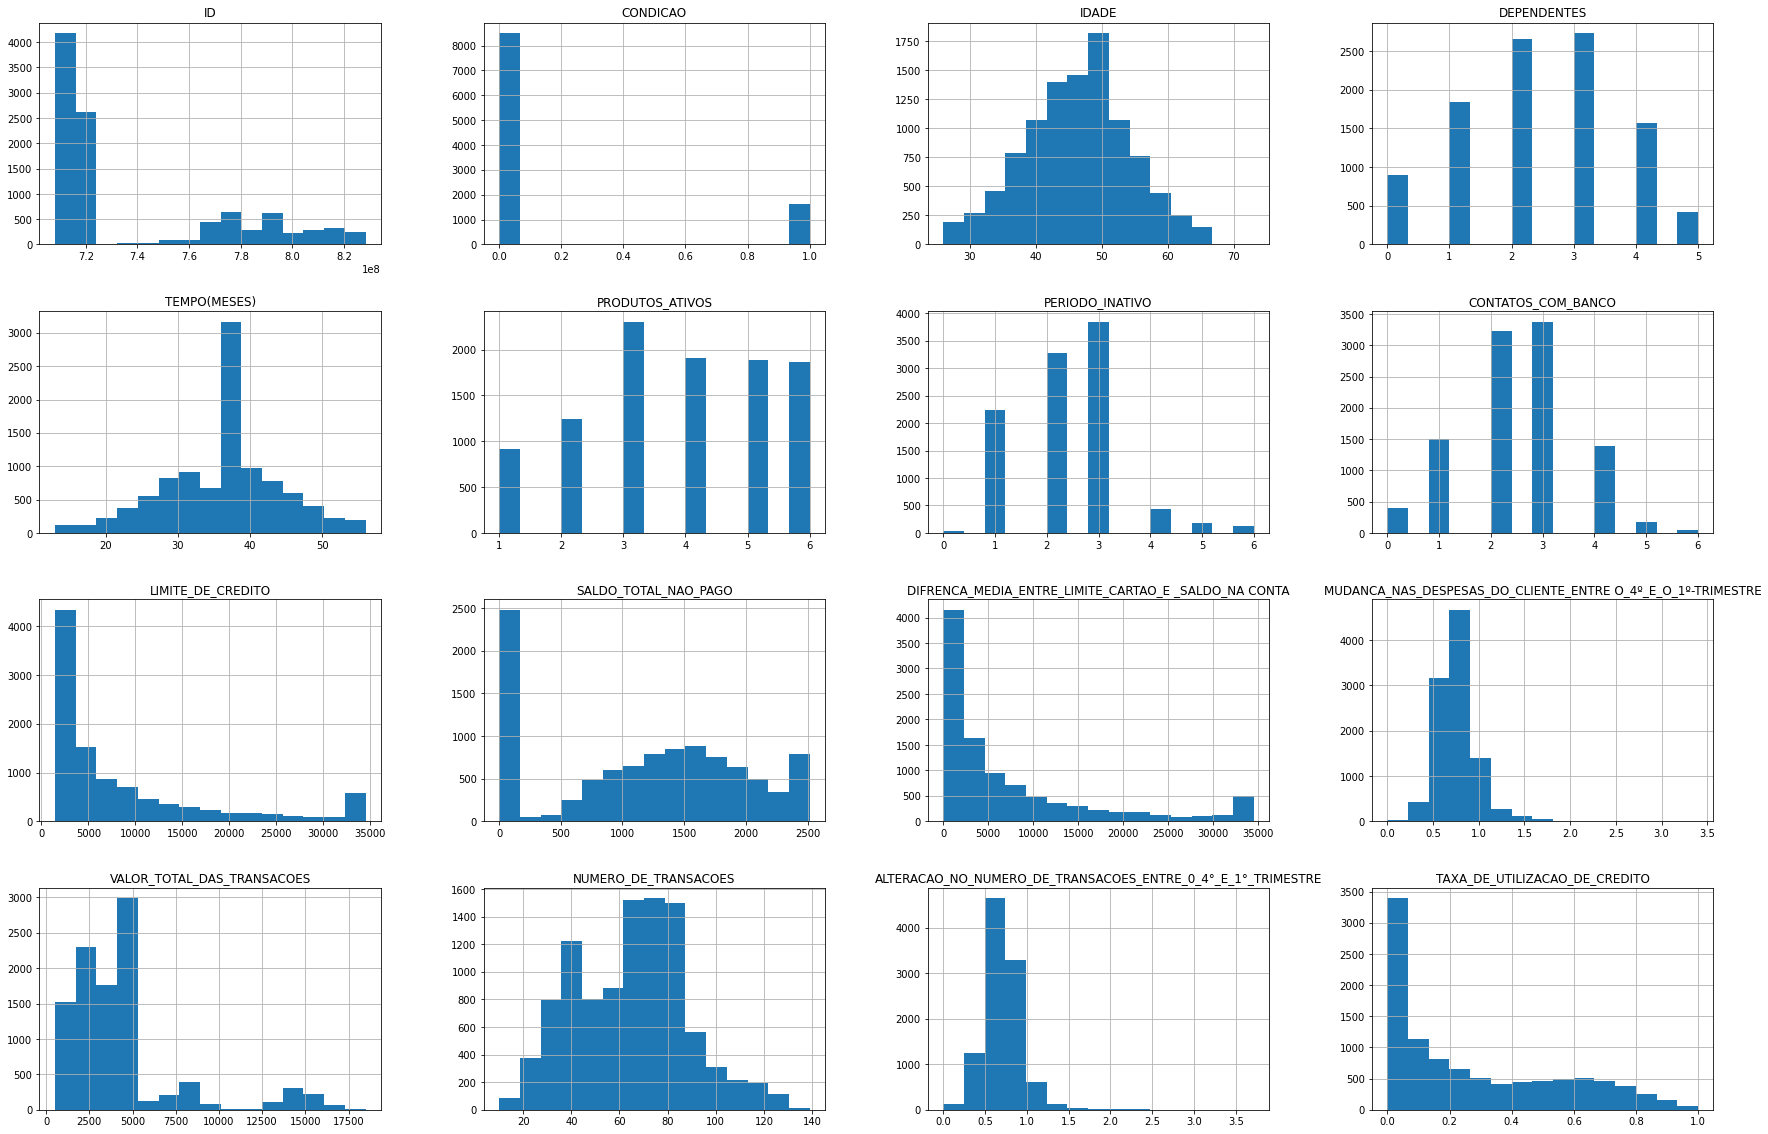

In [ ]:
base_credito.hist(figsize=(30,20,),bins=15);

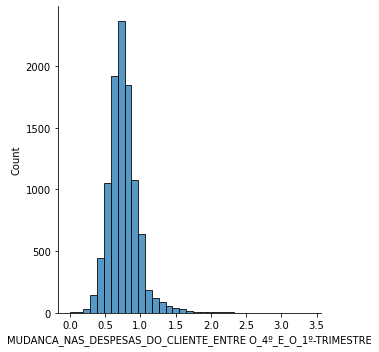

In [ ]:
sns.displot(base_credito['MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE'], bins=35);

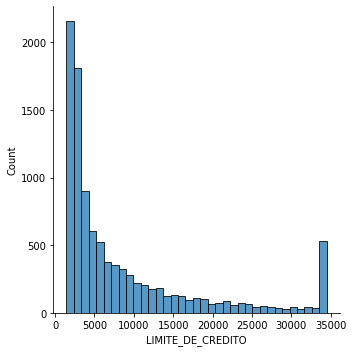

In [ ]:
sns.displot(base_credito['LIMITE_DE_CREDITO'], bins=35);

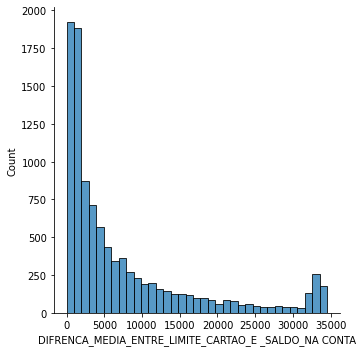

In [ ]:
sns.displot(base_credito['DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA'], bins=35);

In [ ]:
def total(linha):
    if linha <= 6000 :
        return "BAIXO"

    if  6000 < linha <= 12000:
        return "MEDIO"

    if linha > 12000:
        return "ALTO"
         
base_credito["NIVEL_COMPRAS"] = base_credito["VALOR_TOTAL_DAS_TRANSACOES"].apply(total) 

In [ ]:
def nivel(linha):
    if linha <= 4549 :
        return "BAIXO"

    if  3735 < linha <= 11067.5:
        return "MEDIO"

    if linha > 11067.5:
        return "ALTO"
         
base_credito["NIVEL_CREDITO"] = base_credito["LIMITE_DE_CREDITO"].apply(nivel) 

In [ ]:
def despesas(linha):
    if linha < 0.582 :
        return "BAIXO"

    if  0.582 <= linha <= 0.702:
        return "MEDIO"

    if linha > 0.702:
        return "ALTO"
         
base_credito['AUMENTO_DESPESAS_CLIENTE'] = base_credito["MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE"].apply(despesas)

In [ ]:
def diferenca(linha):
    if linha <= 5000 :
        return "BAIXO"

    if  5000 < linha <= 15000:
        return "MEDIO"

    if linha > 15000:
        return "ALTO"
         
base_credito["NIVEL_DIFERENCA_SALDO_CONTA/CARTAO"] = base_credito["DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA"].apply(diferenca) 

In [ ]:
def saldo_devedor(linha):
    if linha <= 500 :
        return "BAIXO"

    if  500 < linha <= 2000:
        return "MEDIO"

    if linha > 2000:
        return "ALTO"
         
base_credito["NIVEL_SALDO_NAO_PAGO"] = base_credito["SALDO_TOTAL_NAO_PAGO"].apply(saldo_devedor) 

In [ ]:
def taxa(linha):
    if linha <= 0.2 :
        return "BAIXO"

    if  0.2 < linha <= 0.6:
        return "MEDIO"

    if linha > 0.6:
        return "ALTO"
         
base_credito["NIVEL_UTILIZACAO_DE_CREDITO"] = base_credito["TAXA_DE_UTILIZACAO_DE_CREDITO"].apply(taxa) 

In [ ]:
def total(linha):
    if linha <= 6000 :
        return "BAIXO"

    if  6000 < linha <= 12000:
        return "MEDIO"

    if linha > 12000:
        return "ALTO"
         
base_credito["NIVEL_VALOR_TRANSACOES"] = base_credito["VALOR_TOTAL_DAS_TRANSACOES"].apply(total) 

In [ ]:
base_credito.head(5)

,ID,CONDICAO,IDADE,GENERO,DEPENDENTES,INSTRUÇAO,ESTADO_CIVIL,RENDA,TIPO_DO_CARTAO,TEMPO(MESES),PRODUTOS_ATIVOS,PERIODO_INATIVO,CONTATOS_COM_BANCO,LIMITE_DE_CREDITO,SALDO_TOTAL_NAO_PAGO,DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA,MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE,VALOR_TOTAL_DAS_TRANSACOES,NUMERO_DE_TRANSACOES,ALTERACAO_NO_NUMERO_DE_TRANSACOES_ENTRE_0_4°_E_1°_TRIMESTRE,TAXA_DE_UTILIZACAO_DE_CREDITO,NIVEL_COMPRAS,NIVEL_CREDITO,AUMENTO_DESPESAS_CLIENTE,NIVEL_DIFERENCA_SALDO_CONTA/CARTAO,NIVEL_SALDO_NAO_PAGO,NIVEL_UTILIZACAO_DE_CREDITO,NIVEL_VALOR_TRANSACOES
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,BAIXO,ALTO,ALTO,MEDIO,MEDIO,BAIXO,BAIXO
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,BAIXO,MEDIO,ALTO,MEDIO,MEDIO,BAIXO,BAIXO
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,BAIXO,BAIXO,ALTO,BAIXO,BAIXO,BAIXO,BAIXO
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,BAIXO,BAIXO,ALTO,BAIXO,ALTO,ALTO,BAIXO
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,BAIXO,MEDIO,ALTO,BAIXO,BAIXO,BAIXO,BAIXO


In [ ]:
base_credito['CONDICAO'].value_counts()

0    8500
1    1627
Name: CONDICAO, dtype: int64

# Visualização dos dados.

' A análise do gráfico relacionando a idade do cliente à condição de ter abandonado o serviço de crédito,\npermite verificar, que apesar dos desistentes estar concentrados na faixa etária entre 40 e 55 anos, não parece\nser este, um fator determinante.'

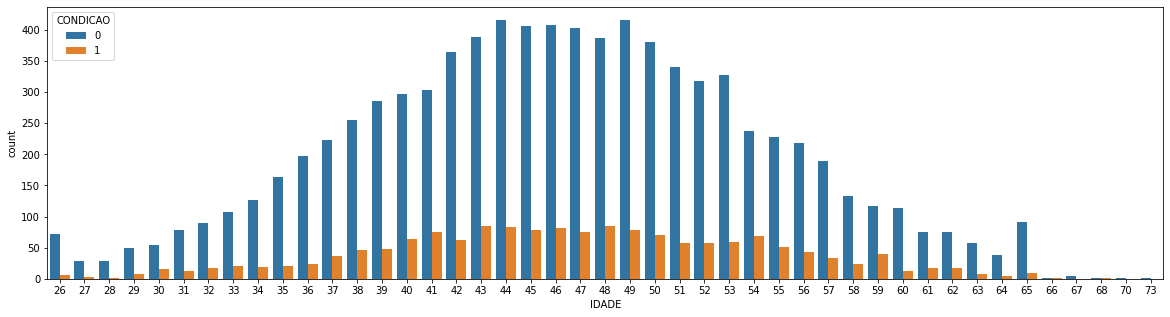

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'IDADE', hue = 'CONDICAO', data= base_credito);

''' A análise do gráfico relacionando a idade do cliente à condição de ter abandonado o serviço de crédito,
permite verificar, que apesar dos desistentes estar concentrados na faixa etária entre 40 e 55 anos, não parece
ser este, um fator determinante.'''


' Clientes com 2 e 3 dependentes possuem a maior tendência a abandonar o serviço,apesar de serem também,\nmais numerosos em relação aos demais, não parecendo este, ser um fator determinante.'

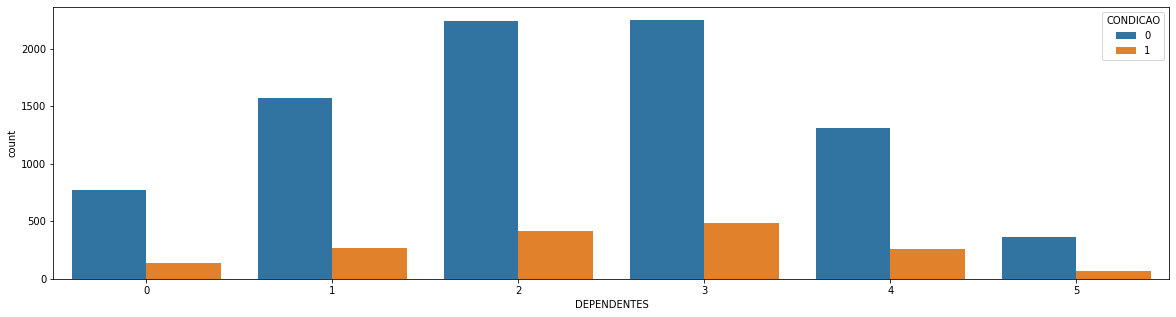

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'DEPENDENTES', hue = 'CONDICAO', data= base_credito,);

''' Clientes com 2 e 3 dependentes possuem a maior tendência a abandonar o serviço,apesar de serem também,
mais numerosos em relação aos demais, não parecendo este, ser um fator determinante.'''

" O período mais emblemático parece ser o de 36 meses, onde temos o amior número de clientes, e proporcionalmente\no maior número de desistências, como a maioria dos clientes utiliza o tipo de cartão 'Blue',há de se verificar se\nhá insatisfação com este serviço.(Observação: como o valor de 36 anos é a medida central do atributo, verifica-se\nque essa discrepância do número de clientes com 36 anos, pode ter sido causada pela substituição de dados NAN, pela\nmediana do atributo)."

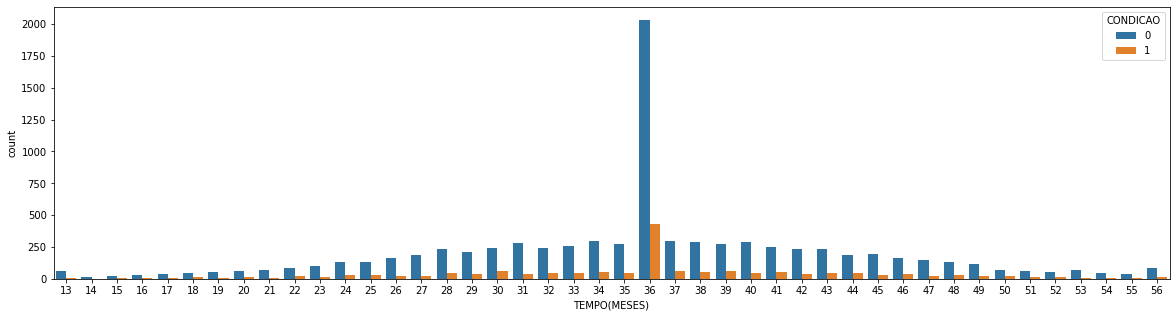

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'TEMPO(MESES)', hue = 'CONDICAO', data= base_credito,);

''' O período mais emblemático parece ser o de 36 meses, onde temos o amior número de clientes, e proporcionalmente
o maior número de desistências, como a maioria dos clientes utiliza o tipo de cartão 'Blue',há de se verificar se
há insatisfação com este serviço.(Observação: como o valor de 36 anos é a medida central do atributo, verifica-se
que essa discrepância do número de clientes com 36 anos, pode ter sido causada pela substituição de dados NAN, pela
mediana do atributo).'''

'Clientes com mais que 3 produtos ativos, tendem a um nível de desistência menor; pode ser uma política\ninteressante, ofertar mais produtos aos clientes com menor quantidade de produtos.'

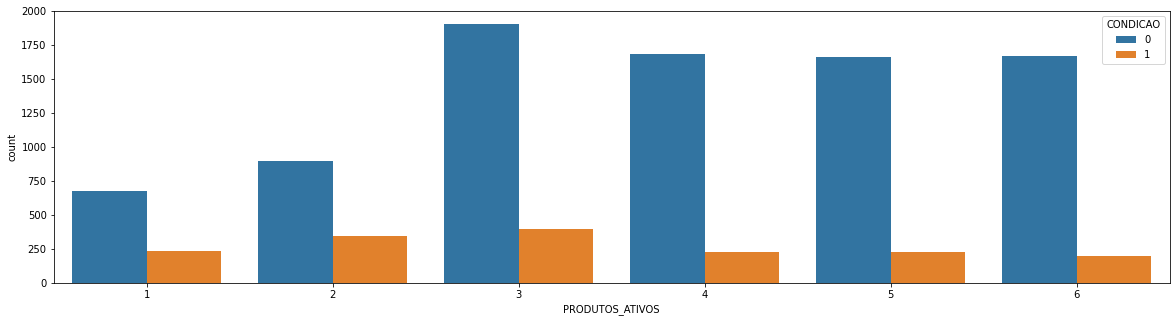

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'PRODUTOS_ATIVOS', hue = 'CONDICAO', data= base_credito,);

'''Clientes com mais que 3 produtos ativos, tendem a um nível de desistência menor; pode ser uma política
interessante, ofertar mais produtos aos clientes com menor quantidade de produtos.'''

' Clientes do sexo feminino compõe a maioria da base, e proporcionalmente, apresentam maior índice de \ndesistência.'

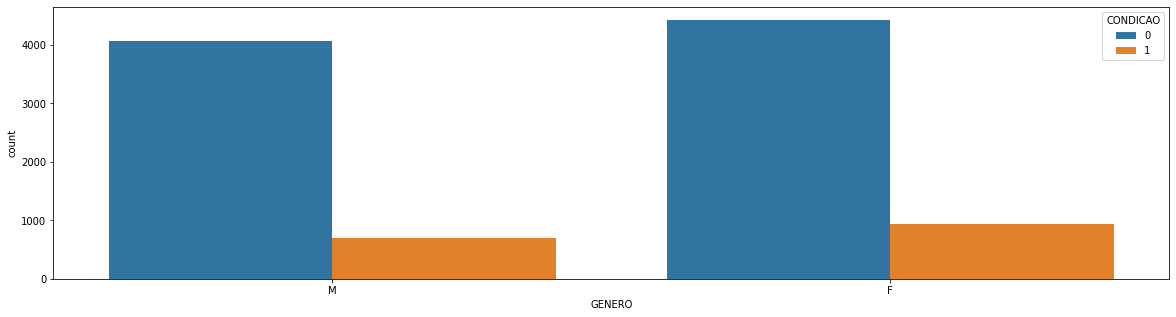

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'GENERO', hue = 'CONDICAO', data= base_credito,);

''' Clientes do sexo feminino compõe a maioria da base, e proporcionalmente, apresentam maior índice de 
desistência.'''

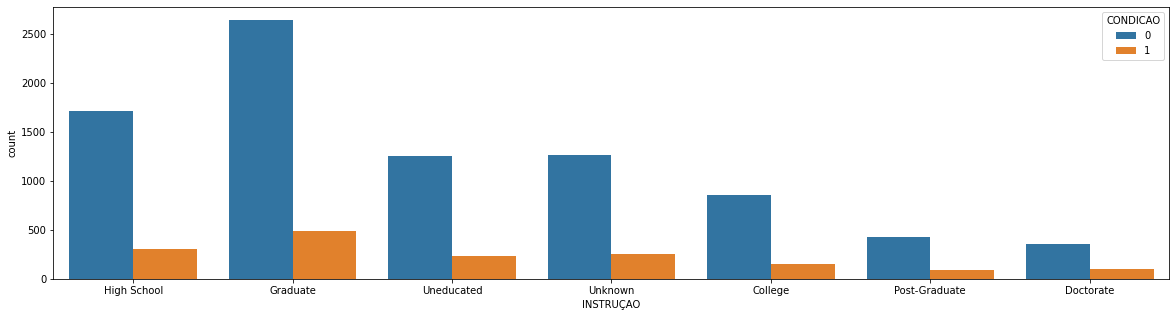

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'INSTRUÇAO', hue = 'CONDICAO', data= base_credito,);

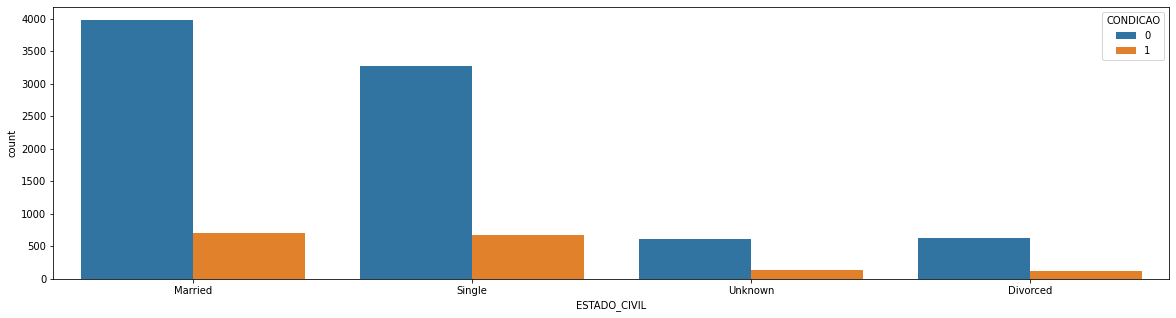

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'ESTADO_CIVIL', hue = 'CONDICAO', data= base_credito,);

' Clientes na menor faixa de renda, compôe a maioria da base de dados e o maior índice de desistências.'

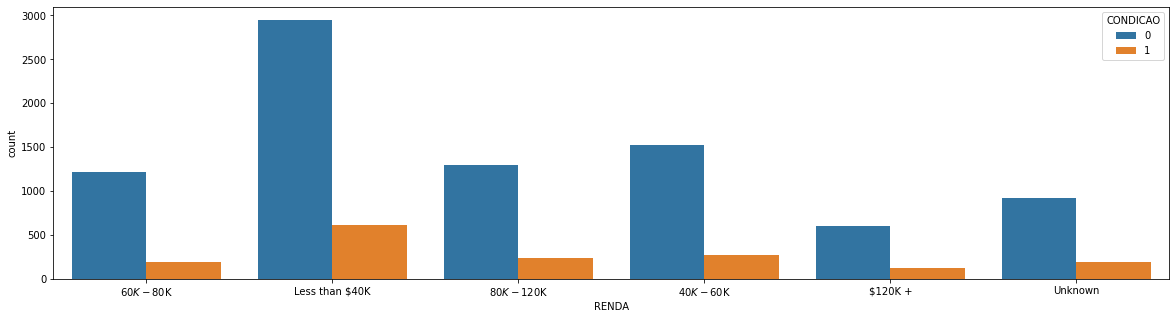

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'RENDA', hue = 'CONDICAO', data= base_credito,);

''' Clientes na menor faixa de renda, compôe a maioria da base de dados e o maior índice de desistências.'''

" Como citado anteriormente, o cartâo 'Blue' é o que aprenta maior número de clientes\ne proporcionalmente, maior número de deistências."

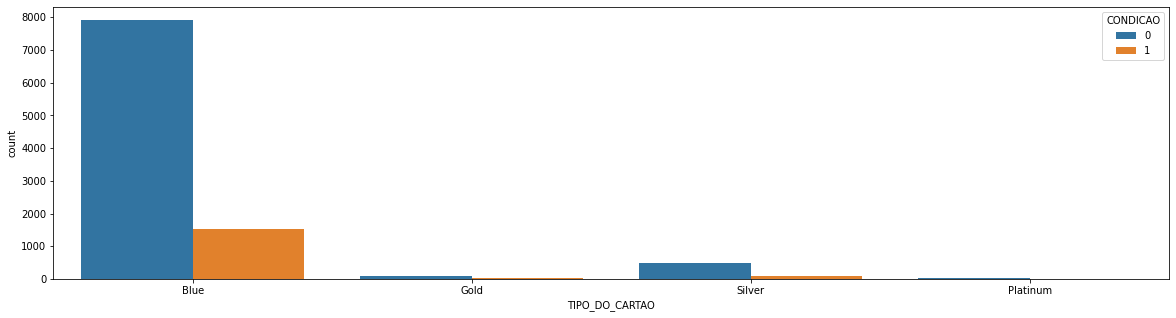

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot( x = 'TIPO_DO_CARTAO', hue = 'CONDICAO', data = base_credito)

''' Como citado anteriormente, o cartâo 'Blue' é o que aprenta maior número de clientes
e proporcionalmente, maior número de deistências.'''

'Alto índice de desistência em clientes que têm dívida zero, ou muito baixa com o cartâo,\nverificar se a baixa utilização do rotativo  decorre de boa taxa de adimplência ou de subutilização do serviço.'

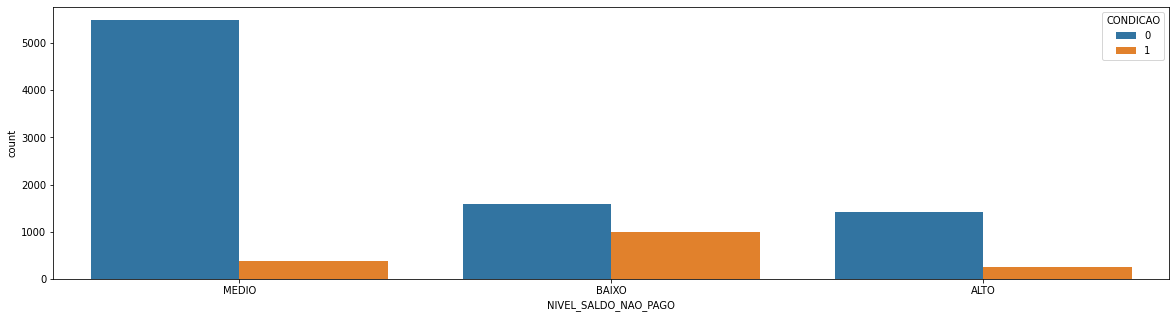

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'NIVEL_SALDO_NAO_PAGO', hue = 'CONDICAO', data = base_credito)

'''Alto índice de desistência em clientes que têm dívida zero, ou muito baixa com o cartâo,
verificar se a baixa utilização do rotativo  decorre de boa taxa de adimplência ou de subutilização do serviço.'''

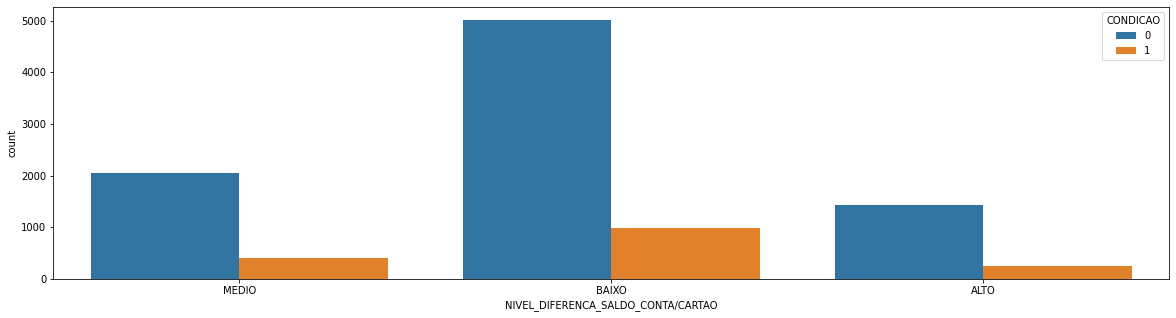

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'NIVEL_DIFERENCA_SALDO_CONTA/CARTAO', hue = 'CONDICAO', data = base_credito)

' Clientes do grupo com maior aumento das despesas, foram os que mais tendera a desistir do serviço.'

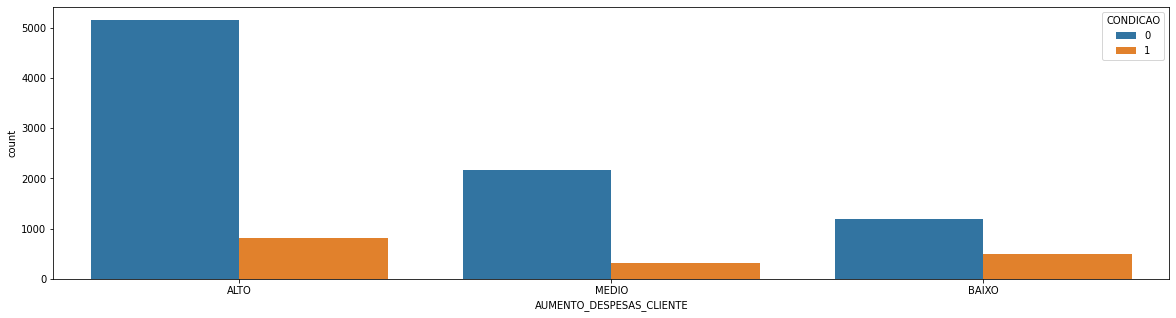

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'AUMENTO_DESPESAS_CLIENTE', hue = 'CONDICAO', data = base_credito, )

''' Clientes do grupo com maior aumento das despesas, foram os que mais tendera a desistir do serviço.'''

' Clientes com menor nível de compras no cartâo, apresentam o maior índice de desistência do serviço, que pode\nter sido impactado pela relação custo benefício, do serviço.'

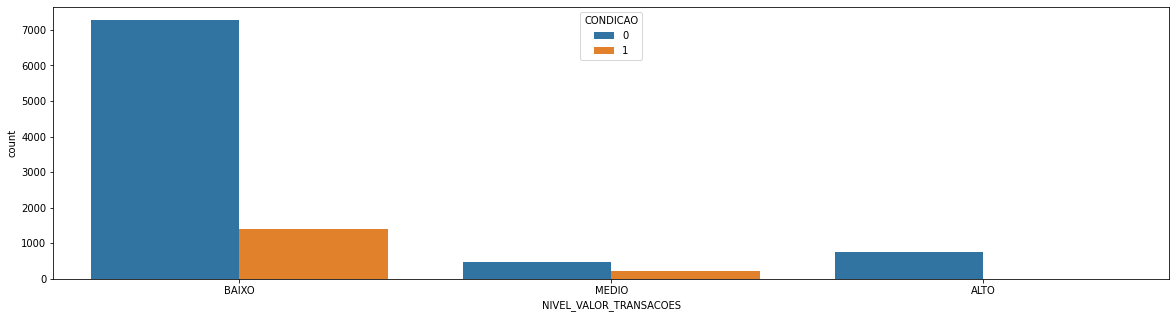

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'NIVEL_VALOR_TRANSACOES', hue = 'CONDICAO', data = base_credito);

''' Clientes com menor nível de compras no cartâo, apresentam o maior índice de desistência do serviço, que pode
ter sido impactado pela relação custo benefício, do serviço.'''


' Clientes que ultilizam pouco crédito, foram impactados com um aumento substancial de despesas,\npodendo este, ser um fator determinante para o abandono do serviço.'

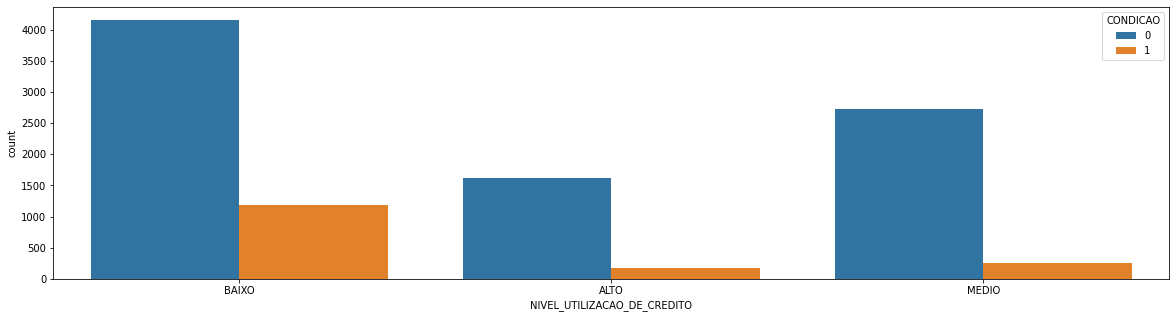

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'NIVEL_UTILIZACAO_DE_CREDITO', hue = 'CONDICAO', data = base_credito, )

''' Clientes que ultilizam pouco crédito, foram impactados com um aumento substancial de despesas,
podendo este, ser um fator determinante para o abandono do serviço.'''

" Clientes do tipo de cartâo 'Blue' e 'Silver, foram impactados com um aumento substancial das despesas no último\ntrimestre, podendo ser este um fator determinante para cancelamento do serviço."

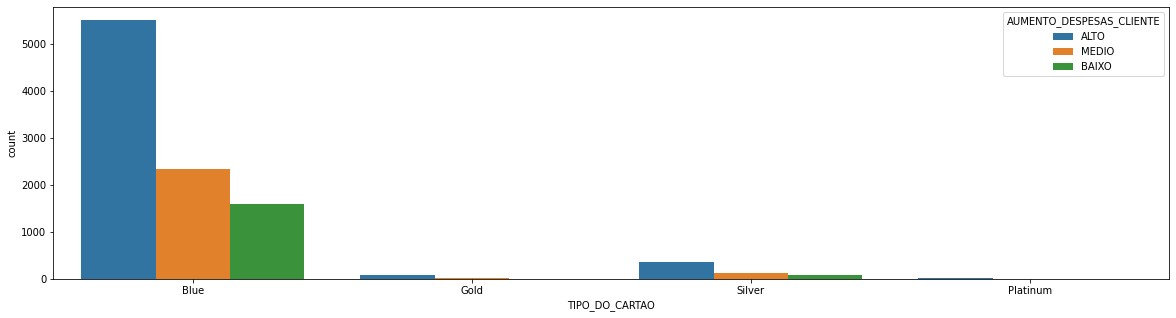

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'TIPO_DO_CARTAO', hue = 'AUMENTO_DESPESAS_CLIENTE', data = base_credito, )

''' Clientes do tipo de cartâo 'Blue' e 'Silver, foram impactados com um aumento substancial das despesas no último
trimestre, podendo ser este um fator determinante para cancelamento do serviço.'''

Blue        1395
Silver       117
Gold          21
Platinum       2
Name: TIPO_DO_CARTAO, dtype: int64 Blue        645
Silver       60
Gold         18
Platinum      4
Name: TIPO_DO_CARTAO, dtype: int64


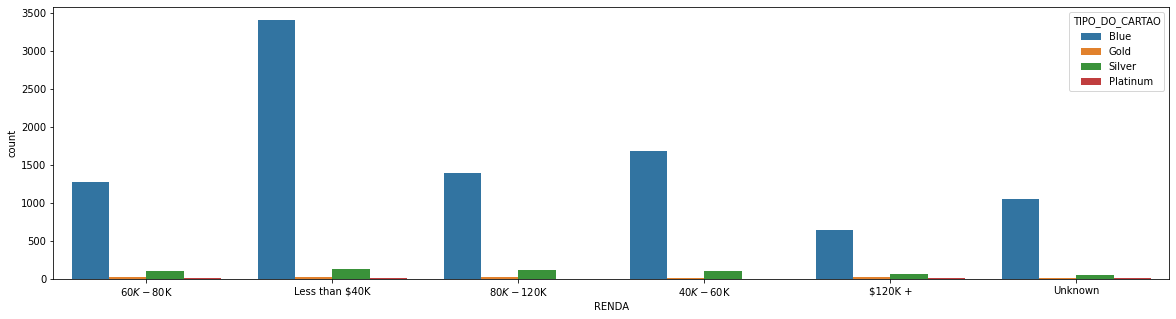

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'RENDA', hue = 'TIPO_DO_CARTAO', data = base_credito, )

''' Há muitos clientes com um nível de renda alto, que ultilizam o cartão 'Blue', oferecer um serviço superior,
pode gerar mais rentabilidade e fidelidade, na renda entre $80000 e $120000, temos 1395 clientes com o cartão
'BLUE' e 117 clientes com o cartão 'SILVER'.Na faixa mais alta de renda temos 645 clientes com o cartão 'BLUE',
e 60 com o cartâo 'SILVER' '''

renda_80_120 = base_credito[base_credito['RENDA'] == '$80K - $120K']['TIPO_DO_CARTAO'].value_counts()
renda_120 = base_credito[base_credito['RENDA'] == '$120K +']['TIPO_DO_CARTAO'].value_counts()
print(renda_80_120, renda_120)

ALTO     646
MEDIO    470
BAIXO    419
Name: NIVEL_DIFERENCA_SALDO_CONTA/CARTAO, dtype: int64 ALTO     399
MEDIO    192
BAIXO    136
Name: NIVEL_DIFERENCA_SALDO_CONTA/CARTAO, dtype: int64


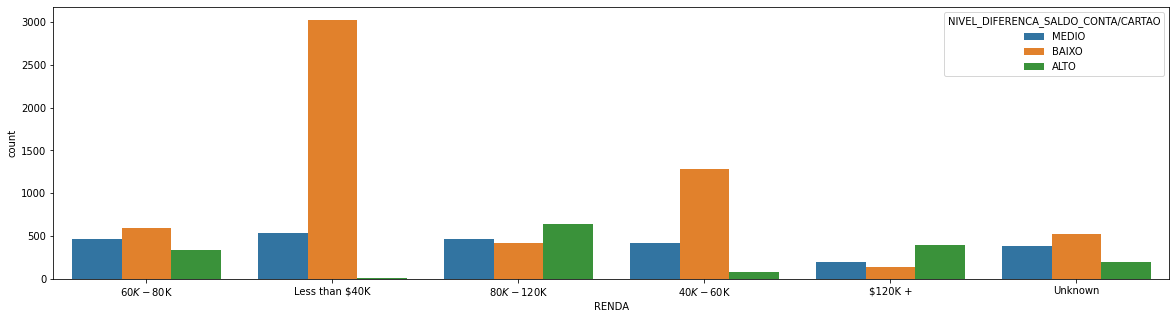

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'RENDA', hue = 'NIVEL_DIFERENCA_SALDO_CONTA/CARTAO', data = base_credito, )

''' Clientes situados na maior faixa de renda, são os que apresentam maior diferença entre saldo na conta,
 e limite do cartâo, aumentar seu limite pode gerar uma rentabilidade maior, sâo 399 clientes com alto nível
 de renda, e limite de crédito baixo'''

renda_80_120 = base_credito[base_credito['RENDA'] == '$80K - $120K']['NIVEL_DIFERENCA_SALDO_CONTA/CARTAO'].value_counts()
renda_120 = base_credito[base_credito['RENDA'] == '$120K +']['NIVEL_DIFERENCA_SALDO_CONTA/CARTAO'].value_counts()
print(renda_80_120, renda_120)

' Provavelvente essa base de dados foi tratada anteriormente, e esse valor foi preenchido com algum valor\nde média ou mediana, pois é muito discrepante em relação aos outros, mas estando o dado correto, percebe-se, \nque há clientes com um tempo significativo no serviço, com o cartâo mais básico, avaliar uma promoção no nível \ndo serviço, poderia melhorar a fidelidade e os rendimentos.'

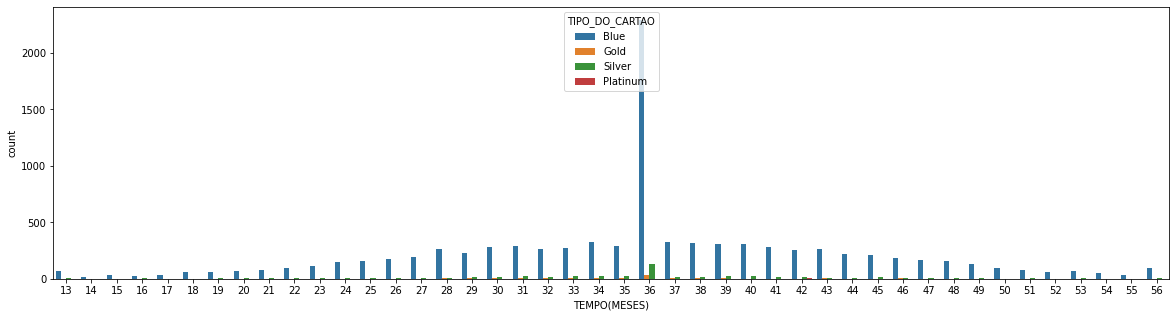

In [ ]:

plt.figure(figsize=[20,5])
sns.countplot(x = 'TEMPO(MESES)', hue = 'TIPO_DO_CARTAO', data = base_credito, )

''' Provavelvente essa base de dados foi tratada anteriormente, e esse valor foi preenchido com algum valor
de média ou mediana, pois é muito discrepante em relação aos outros, mas estando o dado correto, percebe-se, 
que há clientes com um tempo significativo no serviço, com o cartâo mais básico, avaliar uma promoção no nível 
do serviço, poderia melhorar a fidelidade e os rendimentos.'''

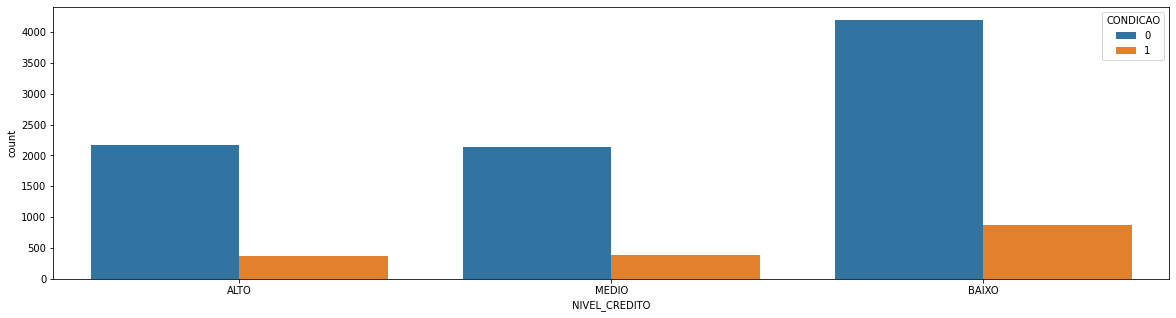

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'NIVEL_CREDITO', hue = 'CONDICAO', data = base_credito, )

# Modelagem dos dados.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
base_credito.head()

,ID,CONDICAO,IDADE,GENERO,DEPENDENTES,INSTRUÇAO,ESTADO_CIVIL,RENDA,TIPO_DO_CARTAO,TEMPO(MESES),PRODUTOS_ATIVOS,PERIODO_INATIVO,CONTATOS_COM_BANCO,LIMITE_DE_CREDITO,SALDO_TOTAL_NAO_PAGO,DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA,MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE,VALOR_TOTAL_DAS_TRANSACOES,NUMERO_DE_TRANSACOES,ALTERACAO_NO_NUMERO_DE_TRANSACOES_ENTRE_0_4°_E_1°_TRIMESTRE,TAXA_DE_UTILIZACAO_DE_CREDITO,NIVEL_COMPRAS,NIVEL_CREDITO,AUMENTO_DESPESAS_CLIENTE,NIVEL_DIFERENCA_SALDO_CONTA/CARTAO,NIVEL_SALDO_NAO_PAGO,NIVEL_UTILIZACAO_DE_CREDITO,NIVEL_VALOR_TRANSACOES
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,BAIXO,ALTO,ALTO,MEDIO,MEDIO,BAIXO,BAIXO
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,BAIXO,MEDIO,ALTO,MEDIO,MEDIO,BAIXO,BAIXO
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,BAIXO,BAIXO,ALTO,BAIXO,BAIXO,BAIXO,BAIXO
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,BAIXO,BAIXO,ALTO,BAIXO,ALTO,ALTO,BAIXO
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,BAIXO,MEDIO,ALTO,BAIXO,BAIXO,BAIXO,BAIXO


In [ ]:
y_credito = base_credito.iloc[:,1]

In [ ]:
x_credito = base_credito.iloc[:,2:21]

In [ ]:
x_credito.columns

Index(['IDADE', 'GENERO', 'DEPENDENTES', 'INSTRUÇAO', 'ESTADO_CIVIL', 'RENDA',
       'TIPO_DO_CARTAO', 'TEMPO(MESES)', 'PRODUTOS_ATIVOS', 'PERIODO_INATIVO',
       'CONTATOS_COM_BANCO', 'LIMITE_DE_CREDITO', 'SALDO_TOTAL_NAO_PAGO',
       'DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA',
       'MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE',
       'VALOR_TOTAL_DAS_TRANSACOES', 'NUMERO_DE_TRANSACOES',
       'ALTERACAO_NO_NUMERO_DE_TRANSACOES_ENTRE_0_4°_E_1°_TRIMESTRE',
       'TAXA_DE_UTILIZACAO_DE_CREDITO'],
      dtype='object')

In [ ]:
x_credito2 = base_credito.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,17,18,21,22,23,24,25,26]]

In [ ]:
x_credito2.columns

Index(['IDADE', 'GENERO', 'DEPENDENTES', 'INSTRUÇAO', 'ESTADO_CIVIL', 'RENDA',
       'TIPO_DO_CARTAO', 'TEMPO(MESES)', 'PRODUTOS_ATIVOS', 'PERIODO_INATIVO',
       'CONTATOS_COM_BANCO', 'VALOR_TOTAL_DAS_TRANSACOES',
       'NUMERO_DE_TRANSACOES', 'NIVEL_COMPRAS', 'NIVEL_CREDITO',
       'AUMENTO_DESPESAS_CLIENTE', 'NIVEL_DIFERENCA_SALDO_CONTA/CARTAO',
       'NIVEL_SALDO_NAO_PAGO', 'NIVEL_UTILIZACAO_DE_CREDITO'],
      dtype='object')

In [ ]:
base_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 28 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           10127 non-null  int64  
 1   CONDICAO                                                     10127 non-null  int64  
 2   IDADE                                                        10127 non-null  int64  
 3   GENERO                                                       10127 non-null  object 
 4   DEPENDENTES                                                  10127 non-null  int64  
 5   INSTRUÇAO                                                    10127 non-null  object 
 6   ESTADO_CIVIL                                                 10127 non-null  object 
 7   RENDA                                                        10127 non-null 

In [ ]:
ct = make_column_transformer((OneHotEncoder(),make_column_selector(dtype_include=object)),
                             (StandardScaler(),make_column_selector(dtype_exclude=object)))

In [ ]:
x_credito = ct.fit_transform(x_credito)

In [ ]:
smt = SMOTE(sampling_strategy = 0.5, random_state= 1 )
x_credito_smote, y_credito_smote = smt.fit_sample(x_credito, y_credito)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_credito_modelada = pd.DataFrame(x_credito)
x_credito_modelada




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714
10123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458
10124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155
10125,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155


In [ ]:
x_credito_modelada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10127 non-null  float64
 1   1       10127 non-null  float64
 2   2       10127 non-null  float64
 3   3       10127 non-null  float64
 4   4       10127 non-null  float64
 5   5       10127 non-null  float64
 6   6       10127 non-null  float64
 7   7       10127 non-null  float64
 8   8       10127 non-null  float64
 9   9       10127 non-null  float64
 10  10      10127 non-null  float64
 11  11      10127 non-null  float64
 12  12      10127 non-null  float64
 13  13      10127 non-null  float64
 14  14      10127 non-null  float64
 15  15      10127 non-null  float64
 16  16      10127 non-null  float64
 17  17      10127 non-null  float64
 18  18      10127 non-null  float64
 19  19      10127 non-null  float64
 20  20      10127 non-null  float64
 21  21      10127 non-null  float64
 22

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_credito,y_credito,random_state=0)
x_train.reshape(-1,1)

array([[ 1.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-1.18692029],
       [-0.12694512],
       [ 1.95193932]])

In [ ]:
x_train.shape, y_train.shape

((7595, 37), (7595,))

In [ ]:
x_credito.shape

(10127, 37)

In [ ]:
x_train_bal,x_test_bal,y_train_bal,y_test_bal = train_test_split(x_credito_smote,y_credito_smote,random_state=0)
x_train.reshape(-1,1)

array([[ 1.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-1.18692029],
       [-0.12694512],
       [ 1.95193932]])

In [ ]:
import pickle

In [ ]:
with open ('base_credito.pkl', mode = 'wb') as f:
  pickle.dump([x_train, x_test, y_train, y_test], f)

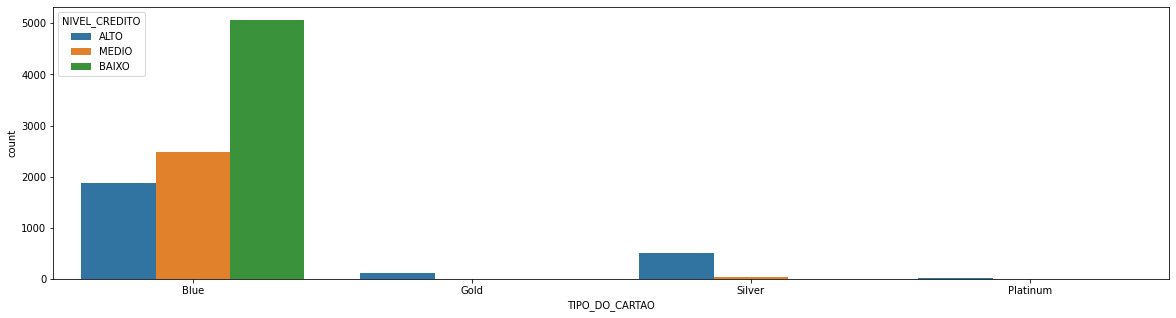

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'TIPO_DO_CARTAO', hue = 'NIVEL_CREDITO', data= base_credito,);

# Análise dos clientes que abandonaram o serviço de crédito.

Criação de um dataframe coma classe de clientes que abandonaram o serviço, para através deste, fazer uma análise mais isolada das variáveis.



In [ ]:
base_credito_saiu = base_credito[base_credito['CONDICAO']==1]

'Através de uma análise inicial dos dados relacionados aos clientes que dispensaram o serviço, é possível traçar\num perfil genérico desse cliente, que pelos dados, é um cliente que utiliza pouco o cartâo, têm um limite de crédito\nmais baixo, em sua maioria faz compras de baixo valor, mas tiveram um aumento substancial nas despesas com o cartâo,\npodendo este ser o gatilho para a desistência do serviço.'

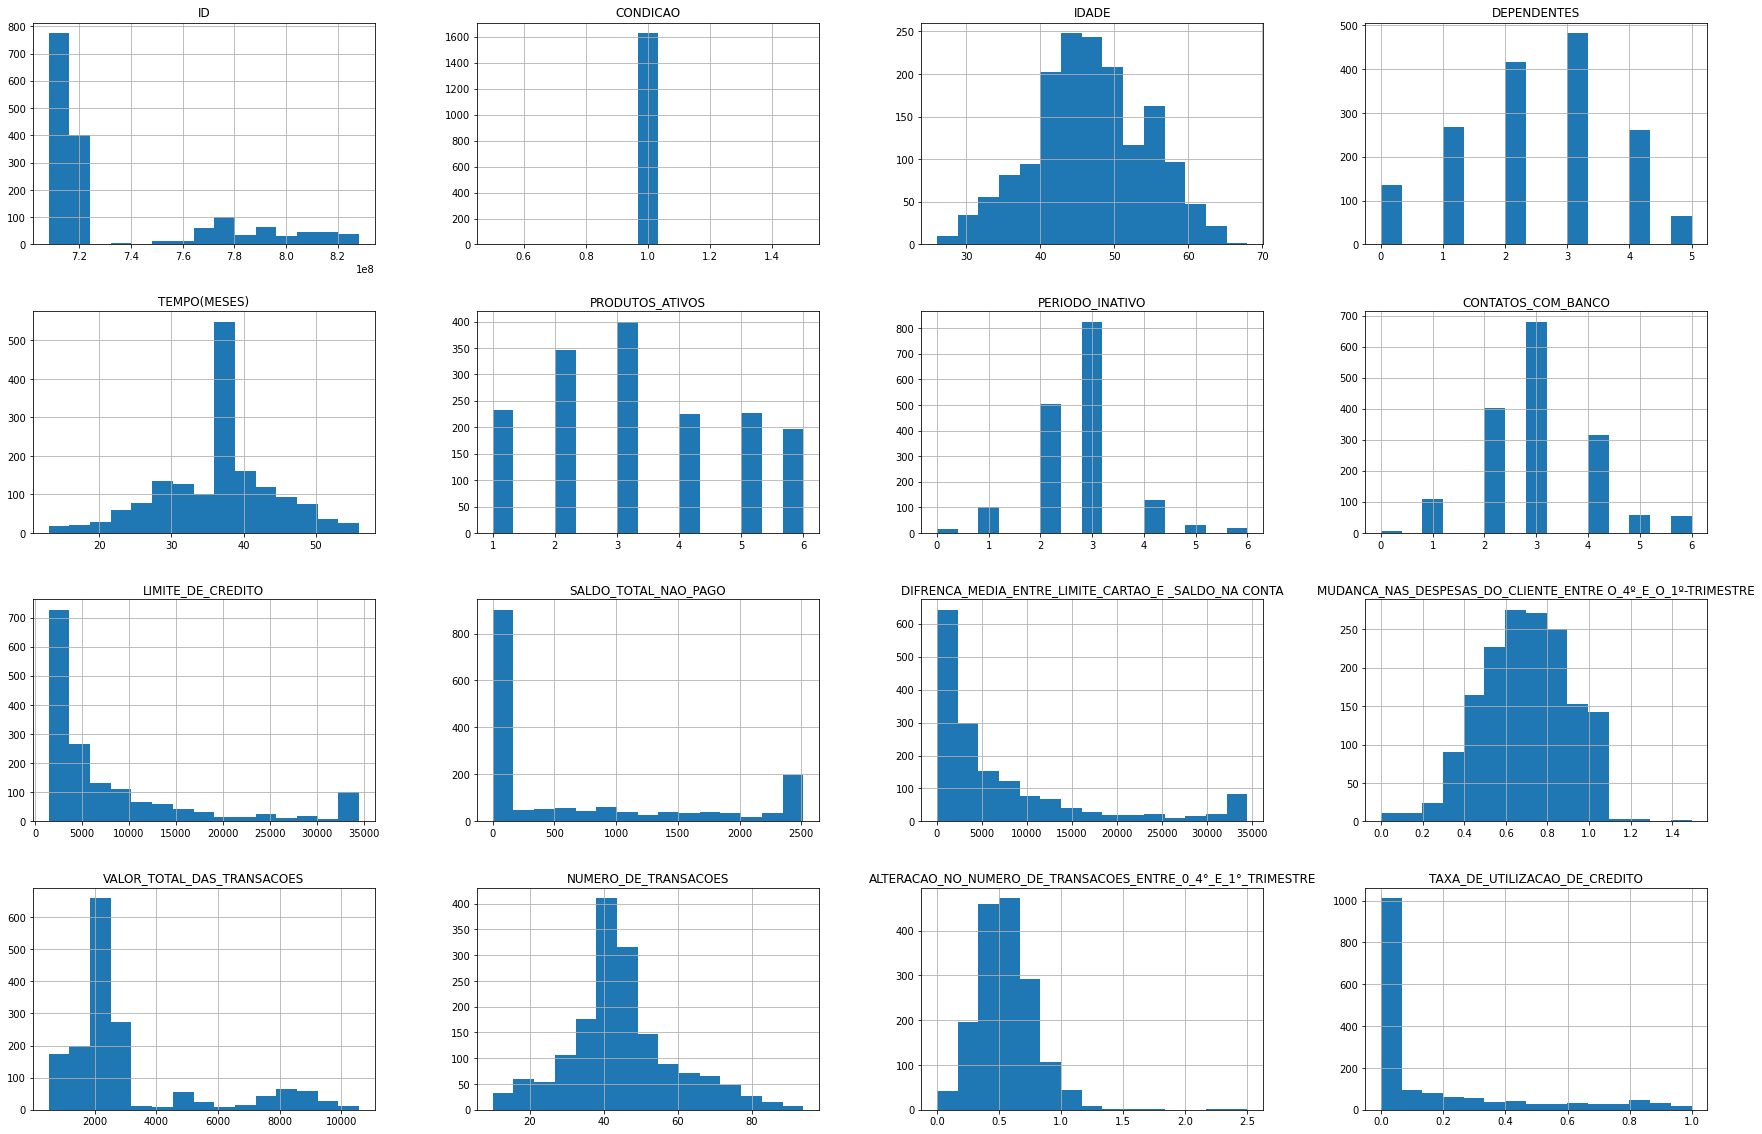

In [ ]:
base_credito_saiu.hist(figsize=(30,20,),bins=15);

'''Através de uma análise inicial dos dados relacionados aos clientes que dispensaram o serviço, é possível traçar
um perfil genérico desse cliente, que pelos dados, é um cliente que utiliza pouco o cartâo, têm um limite de crédito
mais baixo, em sua maioria faz compras de baixo valor, mas tiveram um aumento substancial nas despesas com o cartâo,
podendo este ser o gatilho para a desistência do serviço.'''

Blue      215
Silver     22
Gold        5
Name: TIPO_DO_CARTAO, dtype: int64 Blue      113
Silver     11
Gold        2
Name: TIPO_DO_CARTAO, dtype: int64


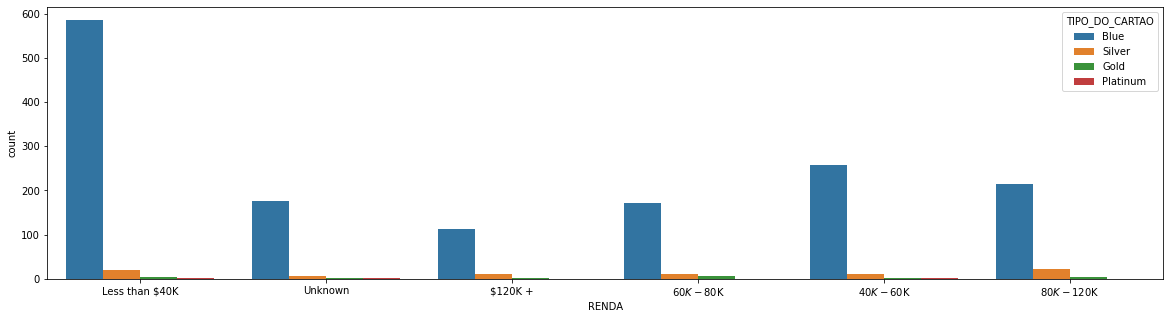

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'RENDA', hue = 'TIPO_DO_CARTAO', data = base_credito_saiu);

''' O gráfico mostra que a maioria dos desistentes está concentrada em uma faixa de renda menor e utilizam o cartâo mais básico,
o que reforça a tese de que, o aumento das despesas pode ter sido decisivo, mas há um número grande de clientes com uma faixa maior
de renda, que utilizavam o cartâo mais básico, e uma oferta de serviço melhor, poderia ter mantido este cliente na base.'''

renda_80_120 = base_credito_saiu[base_credito_saiu['RENDA'] =='$80K - $120K']['TIPO_DO_CARTAO'].value_counts()
renda_120 = base_credito_saiu[base_credito_saiu['RENDA'] == '$120K +']['TIPO_DO_CARTAO'].value_counts()
print(renda_80_120,renda_120)

Less than $40K    254
$80K - $120K      111
$40K - $60K       107
Unknown            89
$60K - $80K        75
$120K +            45
Name: RENDA, dtype: int64

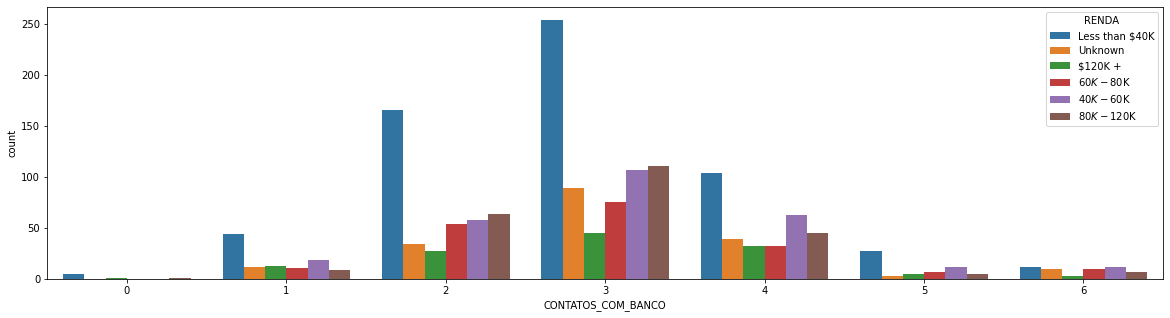

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x = 'CONTATOS_COM_BANCO', hue = 'RENDA', data = base_credito_saiu);

''' O número de dois e três contatos com o banco indica um valor a ser considerado como um alerta, percebe-se
que nesse número, aumenta de maneira significante, o número de ligações com clientes de uma faixa de renda maior.'''

a = base_credito_saiu[base_credito_saiu['CONTATOS_COM_BANCO'] == 3]['RENDA'].value_counts()
a

# Análise dos clientes que compõe a base de crédito.

Criação de uma dataframe com a base de clientes que ainda se mantém no serviço,o objetivo aqui é tentar através de alguns clusters, identificar grupos e verificar a possibilidae de oferecer uma melhora no serviço.

In [ ]:
base_credito_ficou = base_credito[base_credito['CONDICAO']==0]

In [ ]:
base_credito_ficou.head()

,ID,CONDICAO,IDADE,GENERO,DEPENDENTES,INSTRUÇAO,ESTADO_CIVIL,RENDA,TIPO_DO_CARTAO,TEMPO(MESES),PRODUTOS_ATIVOS,PERIODO_INATIVO,CONTATOS_COM_BANCO,LIMITE_DE_CREDITO,SALDO_TOTAL_NAO_PAGO,DIFRENCA_MEDIA_ENTRE_LIMITE_CARTAO_E _SALDO_NA CONTA,MUDANCA_NAS_DESPESAS_DO_CLIENTE_ENTRE O_4º_E_O_1º-TRIMESTRE,VALOR_TOTAL_DAS_TRANSACOES,NUMERO_DE_TRANSACOES,ALTERACAO_NO_NUMERO_DE_TRANSACOES_ENTRE_0_4°_E_1°_TRIMESTRE,TAXA_DE_UTILIZACAO_DE_CREDITO,NIVEL_COMPRAS,NIVEL_CREDITO,AUMENTO_DESPESAS_CLIENTE,NIVEL_DIFERENCA_SALDO_CONTA/CARTAO,NIVEL_SALDO_NAO_PAGO,NIVEL_UTILIZACAO_DE_CREDITO,NIVEL_VALOR_TRANSACOES
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,BAIXO,ALTO,ALTO,MEDIO,MEDIO,BAIXO,BAIXO
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,BAIXO,MEDIO,ALTO,MEDIO,MEDIO,BAIXO,BAIXO
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,BAIXO,BAIXO,ALTO,BAIXO,BAIXO,BAIXO,BAIXO
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,BAIXO,BAIXO,ALTO,BAIXO,ALTO,ALTO,BAIXO
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,BAIXO,MEDIO,ALTO,BAIXO,BAIXO,BAIXO,BAIXO


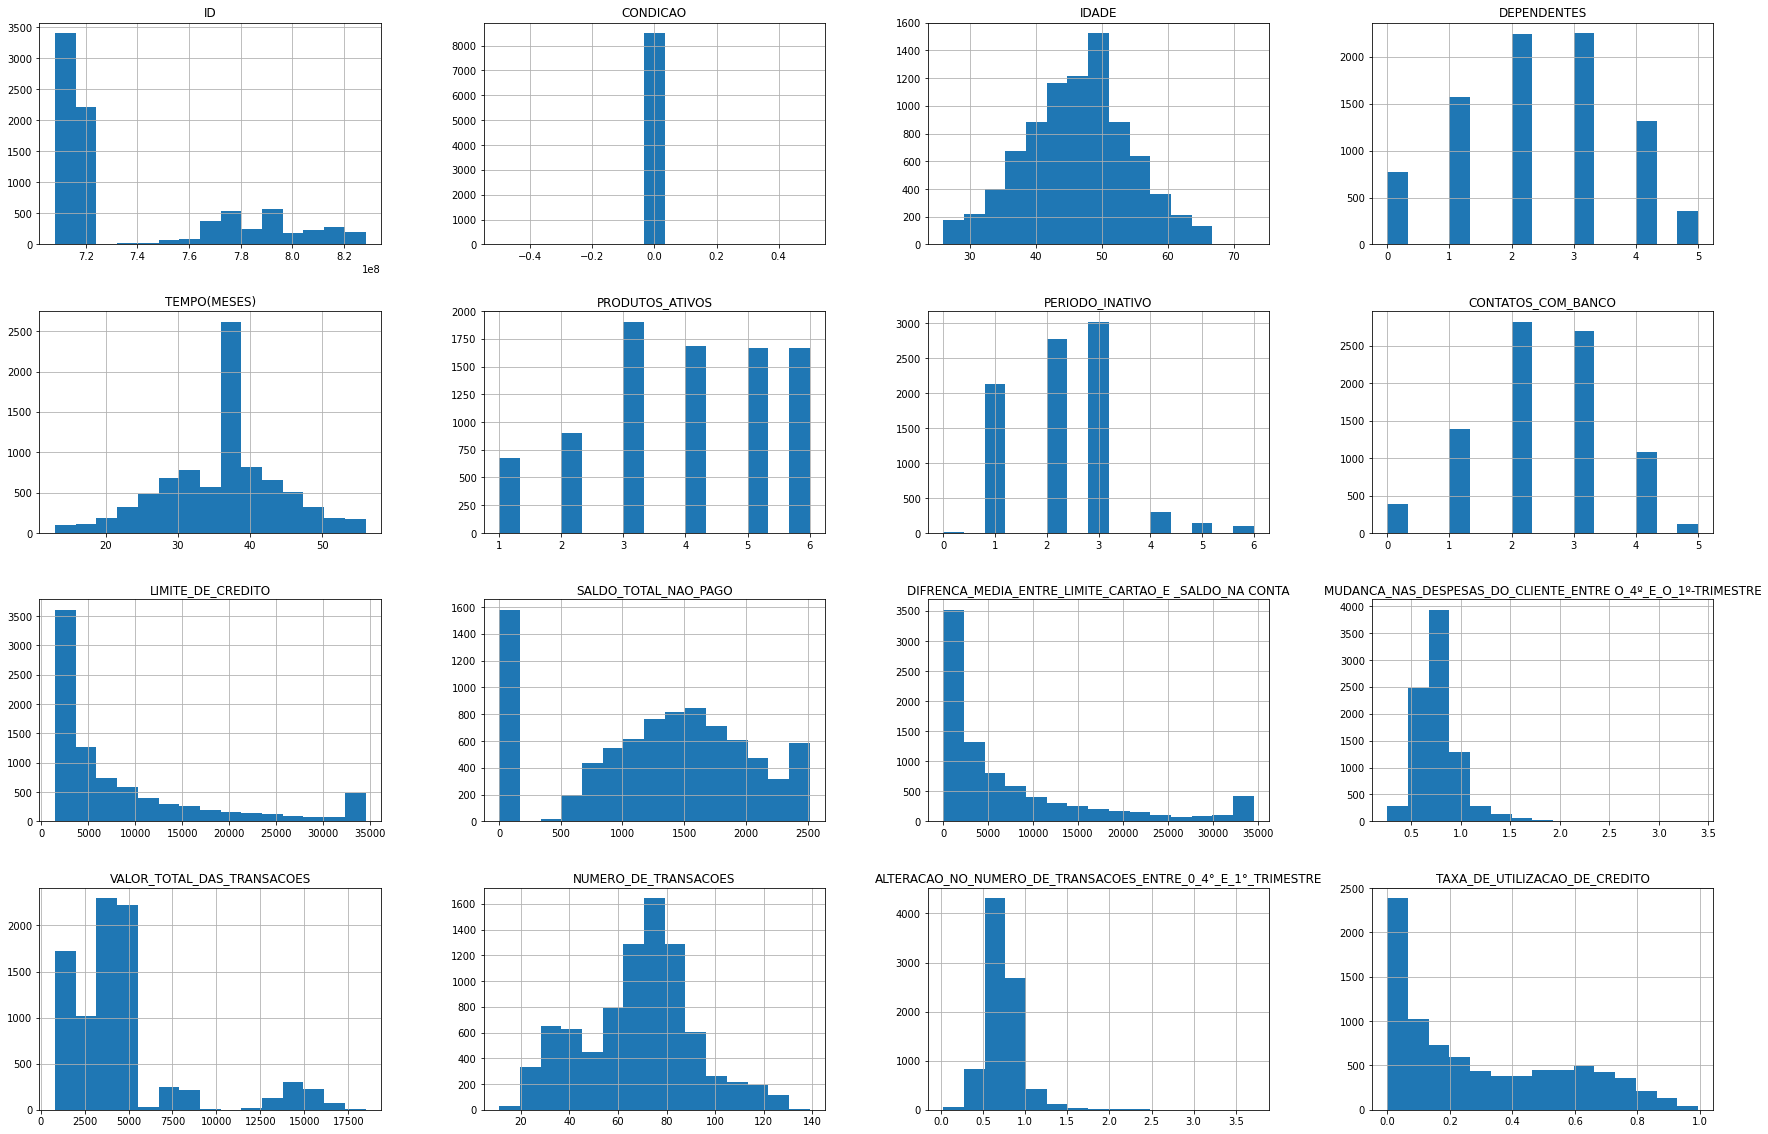

In [ ]:
base_credito_ficou.hist(figsize=(30,20,),bins=15);

In [ ]:
base_cluster = base_credito_ficou[['RENDA','TIPO_DO_CARTAO','NIVEL_COMPRAS','NIVEL_CREDITO','AUMENTO_DESPESAS_CLIENTE',
                                      'NIVEL_DIFERENCA_SALDO_CONTA/CARTAO',	'NIVEL_SALDO_NAO_PAGO',	'NIVEL_UTILIZACAO_DE_CREDITO',
                                      'NIVEL_VALOR_TRANSACOES']]

In [ ]:
base_cluster

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd46ad9810>)],
                  verbose=False)

In [ ]:
base_cluster = make_column_transformer((OneHotEncoder(),make_column_selector(dtype_include=object)))

In [ ]:
from sklearn.cluster import k_means

In [ ]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(base_cluster)
  wcss_1.append(kmeans.inertia_)

NameError: ignored

In [ ]:
kmeans = KMeans(n_clusters=8,random_state=1)
kmeans.fit(base_cluster)
labels = kmeans.labels_

# Regressâo Logística

In [ ]:
with open ('base_credito.pkl', 'rb') as f:
  x_train, x_test, y_train, y_test = pickle.load(f)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo = LogisticRegression(random_state = 0)

In [ ]:
modelo.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
 y_pred = modelo.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.8607277289836889

In [ ]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.96      0.93      0.94      2221\n           1       0.59      0.73      0.65       311\n\n    accuracy                           0.90      2532\n   macro avg       0.77      0.83      0.80      2532\nweighted avg       0.91      0.90      0.91      2532\n'

In [ ]:
recall_score(y_pred,y_test)

0.8043694141012909

In [ ]:
precision_score(y_test, y_pred)

0.7266881028938906

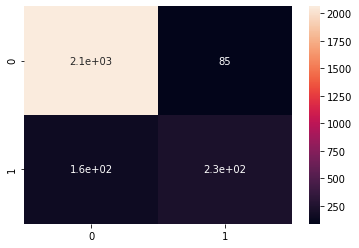

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1934,  197],
       [ 247,  810]])

In [ ]:
x_train2,x_test2,y_train,y_test = train_test_split(x_credito2,y_credito)

In [ ]:
modelo.fit(x_credito2,y_credito)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred2 = modelo.predict(x_test2)

In [ ]:
recall_score(y_pred2,y_test)

0.7696969696969697

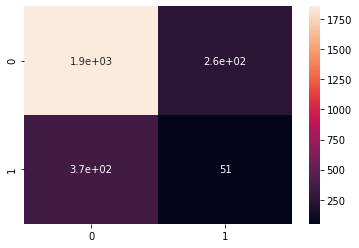

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [ ]:
a = accuracy_score(y_pred2,y_test)
p = precision_score(y_pred2,y_test)
r = recall_score(y_pred2,y_test)
f1 = f1_score(y_pred2,y_test)
cm = confusion_matrix( y_pred2,y_test)


In [ ]:
 print(f"Accuracy {a} Precision {p}\nRecall {r} F1 {f1}\nCM {cm}" ) 

Accuracy 0.9052132701421801 Precision 0.6076555023923444
Recall 0.7696969696969697 F1 0.679144385026738
CM [[2038  164]
 [  76  254]]


In [ ]:
parametros ={'penalty':['l1', 'l2', 'elasticnet'],'dual':[True,False],'tol':[0.001,0.003,0.005],
             'C':[0.5,1.0,2.0,],'fit_intercept':[True,False],'intercept_scaling':[0.3,0.7,1.0],
             'class_weight' : [dict,'balanced',None],'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state = 0)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)

0.834518167456556
0.0
0.0
0.0


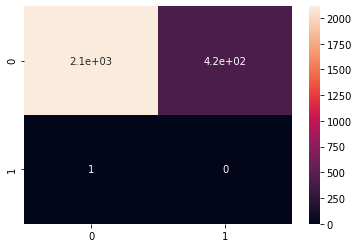

In [ ]:
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
cm = confusion_matrix( y_pred,y_test)
sns.heatmap(cm, annot=True)


In [ ]:
 print(f"Accuracy {a} Precision {p}\nRecall {r} F1 {f1}\nCM {cm}" ) 

Accuracy 0.9052132701421801 Precision 0.6076555023923444
Recall 0.7696969696969697 F1 0.679144385026738
CM [[2113  418]
 [   1    0]]


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
bayes = GaussianNB()
bayes.fit(x_train,y_train)
y_pred = bayes.predict(x_test)

In [ ]:
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
cm = confusion_matrix( y_pred,y_test)


0.8226698262243286
0.004784688995215311
0.05714285714285714
0.008830022075055188


# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

0.934044233807267
0.6770833333333334
0.858085808580858
0.7569141193595342


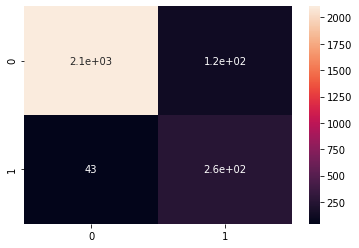

In [ ]:
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
cm = confusion_matrix( y_pred,y_test)
sns.heatmap(cm, annot=True)

# LGBMC

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbmc = LGBMClassifier()
lgbmc.fit(x_train,y_train)
y_pred = lgbmc.predict(x_test)

In [ ]:
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
cm = confusion_matrix( y_pred,y_test)
sns.heatmap(cm, annot=True)

# KNN

In [ ]:
with open ('base_credito.pkl', 'rb') as f:
  x_train, x_test, y_train, y_test = pickle.load(f)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier() 
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
cm = confusion_matrix( y_pred,y_test)
cm


0.9142969984202212
0.5598958333333334
0.8174904942965779
0.6646058732612056


array([[2100,  169],
       [  48,  215]])